In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

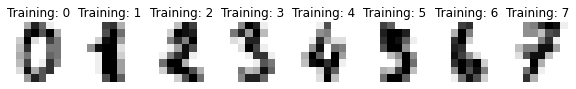

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(digits.images)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [9]:
from sklearn.neural_network import MLPClassifier as mlpc
# flatten the images
data = digits.images.reshape((n_samples, -1))

clf = mlpc()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(predicted)

[8 8 4 9 0 8 9 1 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 2 2 1 4 6 3 1 3 9 1 7 6 8 4 3 3 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 9 7 9 5 9 4 9 0 8 9 8 0 1 2 3 9 5 6 7 9 3 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 9 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 2 2 0 0 1 7 6 3 2 1 7 4 6 3 8 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 9 2 2 5 7 9 5 4 1 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 3 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 5 0 9 5 5 6 5 0
 9 8 9 5 4 1 7 7 5 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 5 7 5 4
 4 7 2 8 2 2 2 7 9 5 4 8 5 4 9 0 8 9 8 0 0 2 3 4 5 6 7 8 9 0 1 2 3 6 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 6 3 1 4 0 5 3 

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier MLPClassifier():
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.94      0.89      0.92        91
           2       0.98      0.97      0.97        86
           3       0.91      0.81      0.86        91
           4       1.00      0.95      0.97        92
           5       0.88      0.92      0.90        91
           6       0.93      0.99      0.96        91
           7       0.93      0.92      0.93        89
           8       0.88      0.90      0.89        88
           9       0.84      0.95      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[85  0  0  0  0  1  2  0  0  0]
 [ 0 81  1  1  0  0  1  1  1  5]
 [ 0  0 83  3  0  0  0  0  0  0]
 [ 0  0  0 74  0  4  0  3  9  1]
 [ 1  2  0  0 87  0  1  0  0  1]
 [ 0  0  0  0  0 84  2  0  0  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  3  0 82  0  4]
 [ 0  2  1  1  0  3  1  1 79  0]
 [ 0  0  0  2  0  1  0  1  1 87]]


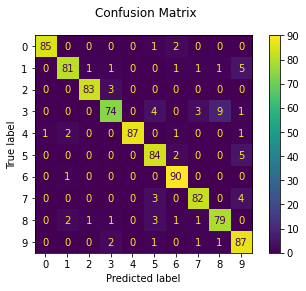

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()